# Проект 2. Разведывательный анализ данных

> **Я знаю, что я ничего не знаю** (Сократ)  

## Цели и задачи проекта

### Цели проекта

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Задачи проекта

- Провести разведывательный анализ исходных данных, на которых в последствии будет строиться модель, предсказывающая результаты госэкзамена по математике для каждого ученика школы.  
- В рамках EDA определить, какие данные оказывают наибольшее влияние на работу модели, а какие могут быть исключены ввиду их слабого влияния.

#### Этапы работы

1. **Первичная обработка** данных.
2. Оценка **распределения признака** для числовых переменных. Устранение выбросов.
3. Оценка количества **уникальных значений** для номинативных переменных.
4. **Преобразование** данных.
5. **Корреляционный анализ** количественных переменных.
6. Отбор **не коррелирующих** переменных.
7. Анализ номинативных переменных. Исключение переменных, **не влияющих** на предсказываемую величину - переменную **score**.
8. **Выводы** относительно качества данных и тех переменных, которые будут использованы в дальнейшем построении модели.

## Краткая информация о данных

В нашем распоряжении имеется датасет с исходными данными, который содержит следующие переменные (из исходных данных к проекту):

1 **school** — аббревиатура школы, в которой учится ученик

2 **sex** — пол ученика ('F' - женский, 'M' - мужской)

3 **age** — возраст ученика (от 15 до 22)

4 **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5 **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6 **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 **failures** — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 **schoolsup** — дополнительная образовательная поддержка (yes или no)

17 **famsup** — семейная образовательная поддержка (yes или no)

18 **paid** — дополнительные платные занятия по математике (yes или no)

19 **activities** — дополнительные внеучебные занятия (yes или no)

20 **nursery** — посещал детский сад (yes или no)

21 **higher** — хочет получить высшее образование (yes или no)

22 **internet** — наличие интернета дома (yes или no)

23 **romantic** — в романтических отношениях (yes или no)

24 **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 **absences** — количество пропущенных занятий

29 **score** — баллы по госэкзамену по математике


\* - Плюс еще одна переменная **studytime, granular**, смысл и важность которой постараемся определить в ходе анализа датасета.

## Первичная обработка данных

Для работы с данными импортируем необходимые модули и зададим некоторые настройки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind
import os
from collections import Counter

# Настройка Matplotlib
%matplotlib inline

# Настройка Pandas
pd.set_option('display.max_rows', 400) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

Загрузим датасет в переменную **stud** и выведем находящиеся в нем данные, а так же информацию о датасете

In [3]:
stud = pd.read_csv('stud_math.csv')
display(stud.head(400))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
display(stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

### Предварительная оценка датасета:
- в датасете представлено **30 столбцов** - признаков
- датасет имеет **395 строк** - объектов
- в датасете присутствует столбец **studytime, granular**, упоминание о котором отсутствует в постановке задачи
- количество пропусков в каждом столбце не превышает **12%** от количества строк
- только **3** столбца не имеют в своем составе пропусков: **school**, **sex**, **age**
- **13 столбцов** представлены числовыми признаками и **17 столбцов** - категориальными

Из общей информации **stud.info()** видно, что к наименованиям столбцов не было применено каких-то унифицированных правил: часть столбцов пишется с заглавной буквы, часть со строчной, один столбец имеет в названии два слова, указанных через запятую (что, строго субъективно, может внести путаницу).

С целью достижения эстетического и технического единообразия приведем наименования всех столбцов к одному стилю: наименование начинается строчной буквой, составные части одного признака сливаются в одно слово.

In [5]:
stud.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 
                     'Mjob': 'mjob', 'Fjob': 'fjob',
                     'studytime, granular': 'studytimegran'}, inplace=True)

Проверим, что у нас получилось в наименованиях признаков

In [6]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytimegran', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

И еще раз взглянем на датасет с переименованными признаками

In [7]:
stud.sample(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytimegran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
207,GP,F,16,U,GT3,T,4.0,3.0,teacher,other,other,mother,1.0,2.0,0.0,no,no,yes,NaN,yes,-6.0,yes,yes,yes,1.0,3.0,2.0,1.0,10.0,65.0
369,MS,F,18,R,GT3,T,4.0,4.0,other,teacher,other,father,3.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,yes,3.0,2.0,2.0,5.0,10.0,55.0
237,GP,F,16,U,NaN,T,2.0,1.0,other,other,home,mother,1.0,1.0,0.0,no,NaN,no,no,yes,-3.0,yes,yes,yes,4.0,5.0,2.0,5.0,20.0,60.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0


### Функции, используемые при обработке данных

#### Функция вывода количества пропусков в заданном признаке и уникальных значений этого признака (количественно и в процентах)

In [8]:
def col_stat(column):
    print('Исследуемый признак:', column)
    col_nan = len(stud[column][stud[column].isna()])
    print('Пропуски (NaN):', col_nan)
    print('Уникальные значения:')
    col_uniq = pd.DataFrame(stud[column].value_counts(dropna=False, normalize = True))
    col_uniqn = pd.DataFrame(stud[column].value_counts(dropna=False))
    col_uniqn.columns = ['Кол-во']
    col_uniqn.loc[:,'Доля в %'] = round(col_uniq[col_uniq.columns[0]]*100, 2)
    col_uniqn.loc['Итого:'] = col_uniqn[['Кол-во','Доля в %']].sum()
    print(col_uniqn,'\n')

#### Функция построения гистограммы распределения исследуемого признака

In [9]:
def col_hist(column):
    plt.figure(figsize=(8, 7))
    stud_hist = stud[column].value_counts(normalize=True).sort_index()
    graph = sns.countplot(stud[column], order=stud_hist.index)
    ax = graph.axes
    ax.set_title('{}'.format(col_name_dict[column]))
    ax.set_ylabel('Количество')
    ax.set_xlabel('Признак {}'.format(column))
    ax.set_ylim(0, 400)
        
    for bar, value in zip(ax.patches, stud_hist):
        x_text = bar.get_x() + bar.get_width()/2
        y_text = bar.get_height()
        ax.annotate('{} уч. \n {}%'.format(y_text, round(100*value, 2)), (x_text, y_text), 
                    ha='center', va='center',
                    fontsize=10, color='black', rotation=0, xytext=(0, 10), 
                    textcoords='offset points')
    plt.show()
    print(col_param_dict[column])

#### Функция поиска выбросов методом межквартильного расстояния

In [10]:
def col_iqr(column, rangecol, binscol):
    median = stud[column].median()
    IQR = stud[column].quantile(0.75) - stud[column].quantile(0.25)
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    print('25-й перцентиль: {}'.format(perc25),'\n'
      '75-й перцентиль: {}'.format(perc75),'\n'
      "IQR: {}".format(IQR),'\n'
      "Границы размаха: [{f}, {l}]".format(f=(perc25 - 1.5*IQR),
                                             l=(perc75 + 1.5*IQR)))


    stud[column].loc[stud[column] <= 22].hist(bins=binscol, 
                                  range=rangecol, 
                                  color='#951753',
                                  label='Выбросы')

    stud[column].loc[stud[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=binscol,
                                                            range=rangecol,
                                                            color='#abcdef',
                                                            label='IQR')

    plt.legend();

#### Словари расшифровки наименований и значений признаков

In [11]:
col_name_dict = {'school': 'Аббревиатура школы, в которой учится ученик',
                 'sex': 'Пол ученика',
                 'age': 'Возраст ученика',
                 'address': 'Тип адреса ученика',
                 'famsize': 'Размер семьи',
                 'pstatus': 'Статус совместного жилья родителей',
                 'medu': 'Образование матери',
                 'fedu': 'Образование отца',
                 'mjob': 'Работа матери',
                 'fjob': 'Работа отца',
                 'reason': 'Причина выбора школы',
                 'guardian': 'Опекун',
                 'traveltime': 'Время в пути до школы',
                 'studytime': 'Время на учебу помимо школы в неделю',
                 'failures': 'Количество внеучебных неудач',
                 'schoolsup': 'Дополнительная образовательная поддержка',
                 'famsup': 'Семейная образовательная поддержка',
                 'paid': 'Дополнительные платные занятия по математике',
                 'activities': 'Дополнительные внеучебные занятия',
                 'nursery': 'Посещал детский сад',
                 'higher': 'Хочет получить высшее образование',
                 'internet': 'Наличие интернета дома',
                 'romantic': 'В романтических отношениях',
                 'famrel': 'Семейные отношения',
                 'freetime': 'Свободное время после школы',
                 'goout': 'Проведение времени с друзьями',
                 'health': 'Текущее состояние здоровья',
                 'absences': 'Количество пропущенных занятий',
                 'score': 'Баллы по госэкзамену по математике',
                 'studytimegran': 'Признак, отсутствующий в описании'
                }

col_param_dict = {'school': '',
                  'sex': 'F - женский, M - мужской',
                  'age': '',
                  'address': 'U - городской, R - за городом',
                  'famsize': 'LE3 - 3 и менее человек, GT3 - более 3 человек',
                  'pstatus': 'T - живут вместе, А - живут раздельно',
                  'medu': '0 - нет, 1 - 4 класса, 2 - 5-9 классов, 3 - среднеспециальное или 11 классов, 4 - высшее',
                  'fedu': '0 - нет, 1 - 4 класса, 2 - 5-9 классов, 3 - среднеспециальное или 11 классов, 4 - высшее',
                  'mjob': 'teacher - учитель, health - сфера здравоохранения, services - гос.служба, at_home - не работает, other - другое',
                  'fjob': 'teacher - учитель, health - сфера здравоохранения, services - гос.служба, at_home - не работает, other - другое',
                  'reason': 'home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое',
                  'guardian': 'mother - мать, father - отец, other - другое',
                  'traveltime': '1 - менее 15 минут, 2 - 15-30 минут, 3 - 30-60 минут, 4 - более 60 минут',
                  'studytime': '1 - менее 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - более 10 часов',
                  'failures': 'n - менее 3, 4 - 3 и более',
                  'schoolsup': '',
                  'famsup': '',
                  'paid': '',
                  'activities': '',
                  'nursery': '',
                  'higher': '',
                  'internet': '',
                  'romantic': '',
                  'famrel': '1 - очень плохо, 5 - очень хорошо',
                  'freetime': '1 - очень мало, 5 - очень много',
                  'goout': '1 - очень мало, 5 - очень много',
                  'health': '1 - очень плохо, 5 - очень хорошо',
                  'absences': '',
                  'score': '',
                  'studytimegran': ''
                 }
    

### Последовательный анализ признаков

### Признак 01 - school

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [12]:
col_stat('school')

Исследуемый признак: school
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
GP       349.0     88.35
MS        46.0     11.65
Итого:   395.0    100.00 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

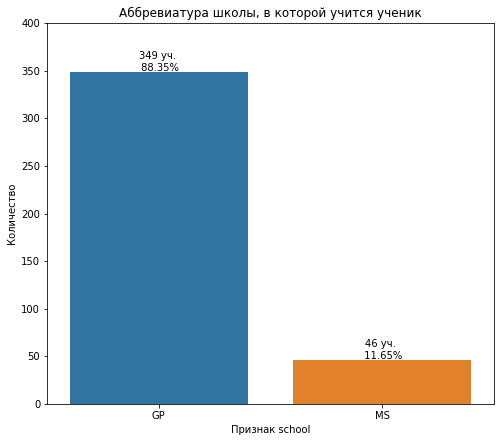

In [13]:
col_hist('school')

#### Промежуточные выводы по признаку school

Пропущенные значения **отсутствуют**.  
Представлены данные об учащихся **двух школ**. Значительная часть обучающихся - **более 88%** - посещает школу **GP**.  
Вероятно, будет рациональным перевести данный признак в **бинарный**.

In [14]:
school_bin = {'GP': 1, 'MS': 0}
stud['school'] = stud['school'].map(school_bin)

Проверим, произошли ли какие-то изменения в столбце **school**

In [15]:
stud.sample(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytimegran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
302,1,F,17,U,GT3,T,4.0,2.0,other,other,reputation,mother,2.0,3.0,0.0,no,NaN,yes,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,0.0,70.0
120,1,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,-6.0,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
131,1,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
288,1,M,18,U,GT3,T,2.0,1.0,services,services,reputation,mother,1.0,3.0,0.0,no,no,yes,yes,yes,-9.0,yes,yes,no,4.0,2.0,4.0,2.0,6.0,70.0
307,1,M,19,U,GT3,NaN,4.0,4.0,teacher,services,reputation,other,2.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,4.0,3.0,4.0,4.0,38.0,40.0


### Признак 02 - sex

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [16]:
col_stat('sex')

Исследуемый признак: sex
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
F        208.0     52.66
M        187.0     47.34
Итого:   395.0    100.00 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

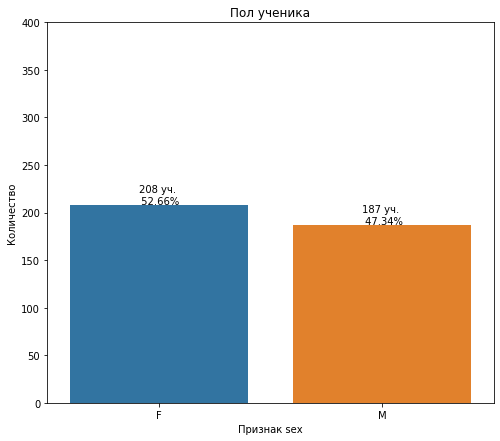

F - женский, M - мужской


In [17]:
col_hist('sex')

#### Промежуточные выводы по признаку sex

Пропущенные значения **отсутствуют**.  
По гендерному признаку участники исследования поделены примерно пополам, однако учащихся **женского пола** все-таки немного больше - **52.66%**.
Данный признак также переведем в бинарный **бинарный**.

In [18]:
sex_bin = {'F': 1, 'M': 0}
stud['sex'] = stud['sex'].map(sex_bin)

In [19]:
stud.sample(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytimegran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
300,1,1,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,-6.0,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
353,0,0,19,R,GT3,T,1.0,1.0,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0
166,1,0,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
274,1,1,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
17,1,1,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0


### Признак 03 - age

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [20]:
col_stat('age')

Исследуемый признак: age
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
16       104.0     26.33
17        98.0     24.81
18        82.0     20.76
15        82.0     20.76
19        24.0      6.08
20         3.0      0.76
22         1.0      0.25
21         1.0      0.25
Итого:   395.0    100.00 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

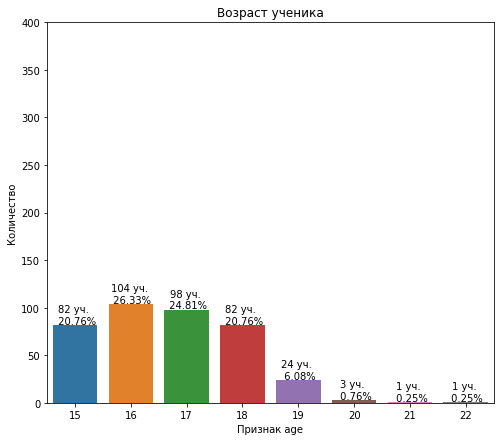

In [21]:
col_hist('age')

#### Промежуточные выводы по признаку age

Пропущенные значения **отсутствуют**.  
Больше всего учащихся в возрасте **16 лет**. Группа учащихся **16-17 лет** составляет более половины от общего числа исследуемых.  
Однако, учитывая тот факт, что в школе маловероятно обучаться до преклонного возраста, следует проверить данный признак на наличие выбросов. Кроме того, значения **20, 21, 22** составляют слишком малое количество, чтобы представлять собой хотя бы один класс (уровень, ступень).  

Наличие выбросов определим с помощью **boxplot**.

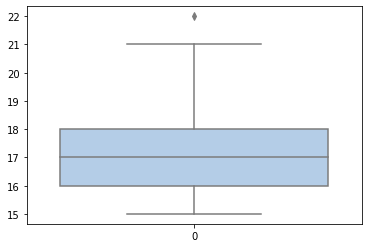

In [22]:
sns.boxplot(data=stud.age, color='#abcdef')

Согласно построенному **boxplot**, выбросом является только значение **22 года**.  
Для большей убедительности применим так же метод **межквартильного расстояния**.

25-й перцентиль: 16.0 
75-й перцентиль: 18.0 
IQR: 2.0 
Границы размаха: [13.0, 21.0]


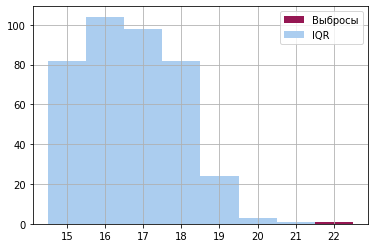

In [23]:
col_iqr('age', rangecol=(14.5, 22.5), binscol=8)

Метод оценки **межквартильного расстояния** определяет границы **размаха** в значениях **13 - нижняя** и **21 - верхняя**.  
Следовательно, значение **21** действительно входит в выборку, хоть и находится на верхней ее границе. Значение же **22**, согласно примененнному методу IQR, является выбросом.  
Поскольку **выброс** по признаку **age** всего **1**, то предположим, что это не системная или статистическая ошибка, а опечатка оператора при вводе данных.  
Заменим значение **age=22** на **age=20** (просто потому, что на цифровой клавиатуре высока вероятность отпечатать 2 вместо 0 :) ).

In [24]:
stud['age'] = stud.apply(lambda x: 20 if (x.age == 22) else x.age, axis=1)

Проверим состояние нашего признака теперь.

In [25]:
col_stat('age')

Исследуемый признак: age
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
16       104.0     26.33
17        98.0     24.81
18        82.0     20.76
15        82.0     20.76
19        24.0      6.08
20         4.0      1.01
21         1.0      0.25
Итого:   395.0    100.00 



Значение **22** отсутствует, в значении **20** прибавилась 1 единица.  
Посмотрим на **основные статистические характеристики** признака **age**.

In [26]:
stud.age.describe()

count    395.000000
mean      16.691139
std        1.258795
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

Видим, что **max** значение теперь равно **21**. Чтобы наглядно убедиться в отсутствии выбросов, еще раз построим **boxplot**.

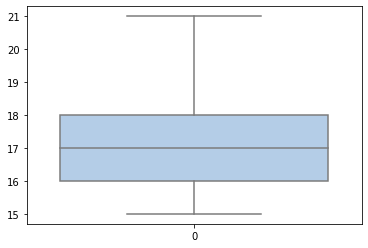

In [27]:
sns.boxplot(data=stud.age, color='#abcdef')

Действительно, выбросы отсутствуют.

Следует однако отметить, что у признака **age** имеется "длинный хвост" справа, то есть в выборке присутствует некоторое количество учеников, чей возраст явно превосходит "нормальный возраст" для обучающихся в школе.  
Можно предположить, что учащиеся, чей возраст превышает правую границу боксплота (18 лет), заканчивают школу позже "нормального возраста".  
**Очевидными причинами могут быть**:
- **плохая успеваемость** и, как следствие - повторное обучение на том или ином году обучения;
- **плохое состояние здоровья**, следствие - также повторное обучение.

### Признак 04 - address

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [28]:
col_stat('address')

Исследуемый признак: address
Пропуски (NaN): 17
Уникальные значения:
        Кол-во  Доля в %
U        295.0     74.68
R         83.0     21.01
NaN       17.0      4.30
Итого:   395.0     99.99 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

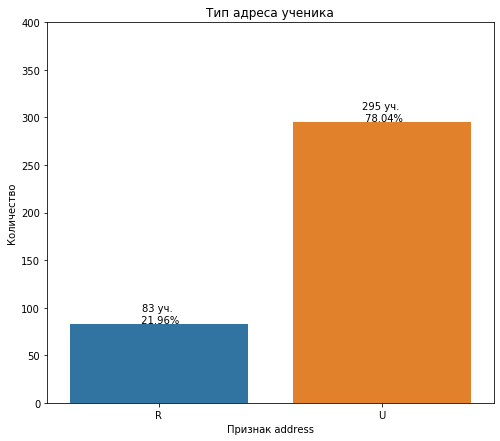

U - городской, R - за городом


In [29]:
col_hist('address')

#### Промежуточные выводы по признаку address

Имеется **17** пропущенных значений.  

Большее количество учеников проживает в городе - **78.04%** от общего числа ненулевых значений.  
Однако, имеются и нулевые значения - **4.3%** от всего количества объектов.  

Для заполнения пропущенных значений проще всего было бы применить метод заполнения самым часто встречающимся значением: в нашем случае - это **U - городской**.  

Однако, поскольку из исходных данных нам известно только **место проживания учащихся**, но ничего не известно о **местах расположения школ**, то выдвинем предположение, что и сами **школы могут находиться в разных территориальных локациях**.  

Предположим, что **школа** с преобладающим количеством **городских учеников** - находится **в городе**. **Школа** с преобладанием **учеников из пригорода** - сама находится **в пригороде**.

Создадим переменные **addressGP** и **addressMS** и посчитаем в них значение учеников из города и из пригорода. Условно примем место расположения каждой школы идентичным месту проживания большинства ее учеников.

In [30]:
# Определим количество каждого типа адресов для школы GP (ранее мы заменили значение 'GP' значением '1')
addressGP = stud[(stud.school == 1)].address.value_counts()
display(addressGP)

U    277
R     60
Name: address, dtype: int64

In [31]:
# Определим количество каждого типа адресов для школы MS (ранее мы заменили значение 'MS' значением '0')
addressMS = stud[(stud.school == 0)].address.value_counts()
display(addressMS)

R    23
U    18
Name: address, dtype: int64

Из приведенных вычислений видно, что в школе **GP** преобладает количество городских учеников, а в школе **MS** - учеников из пригорода. Будем считать, что школа **MS** находится в пригороде. Кроме того, общее количество ее учащихся значительно ниже количества учащихся в школе **GP**, что также может быть свидетельством того, что школа **"сельская"**.

Далее **обработаем пропуски** в признаке **address** по принципу:
- пропуски **address** в школе **GP** (1) заменим значением **U**;
- пропуски **address** в школе **MS** (0) заменим значением **R**.

In [32]:
stud['address'] = stud.apply(lambda x: ('U' if x.school == 1 else 'R') if pd.isna(x.address) else x.address, axis=1)

Проверим, что получилось. Выведем количество значений **U** и **R** по каждой школе.

In [33]:
# Определим количество каждого типа адресов для школы GP (ранее мы заменили значение 'GP' значением '1')
addressGP = stud[(stud.school == 1)].address.value_counts()
display(addressGP)

U    289
R     60
Name: address, dtype: int64

In [34]:
# Определим количество каждого типа адресов для школы MS (ранее мы заменили значение 'MS' значением '0')
addressMS = stud[(stud.school == 0)].address.value_counts()
display(addressMS)

R    28
U    18
Name: address, dtype: int64

Видим, что в школе **GP** увеличилось количество учащихся с территориальным признаком **U**, а количество учащихся с территориальным признаком **R** осталось неизменным.  

Аналогичным образом в школе **MS** увеличилось количество учащихся с территориальным признаком **R**, а количество учащихся с признаком **R** осталось неизменным.

Посмотрим, изменилось ли количество и соотношение значений признака **address** и присутствуют ли теперь пропуски.

In [35]:
col_stat('address')

Исследуемый признак: address
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
U        307.0     77.72
R         88.0     22.28
Итого:   395.0    100.00 



Пропусков нет, оба значения признака увеличились.

### Признак 05 - famsize

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [36]:
col_stat('famsize')

Исследуемый признак: famsize
Пропуски (NaN): 27
Уникальные значения:
        Кол-во  Доля в %
GT3      261.0     66.08
LE3      107.0     27.09
NaN       27.0      6.84
Итого:   395.0    100.01 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

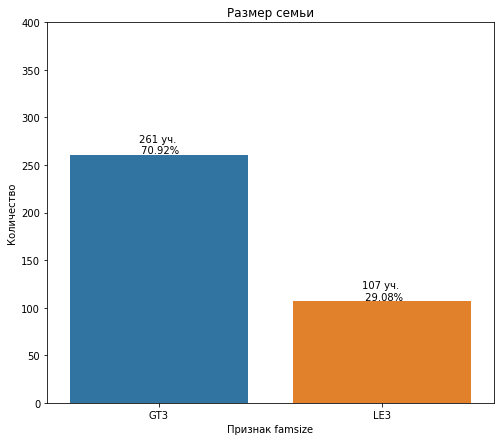

LE3 - 3 и менее человек, GT3 - более 3 человек


In [37]:
col_hist('famsize')

#### Промежуточные выводы по признаку famsize

Имеется **27** пропущенных значений, что составляет **6.84%** от всего количества учащихся.

Две трети учеников проживают в семьях, где более 3 человек, то есть, кроме родителей, имеют братьев/сестер и/или иных родственников.

Может ли быть взаимосвязь между успеваемостью ученика и размером семьи, в которой он проживает? Возможно. Однако сложно предположить, будет ли эта взаимосвязь положительной или отрицательной - приходится ли ученику ухаживать за другими членами семьи, отрывая время от занятий, или, напротив, вся семья ухаживает за учеником, создавая ему условия для учебы? Основываясь на имеющихся данных, ответить сложно, поэтому просто заменим отсутствующие значения на наиболее часто встречающееся - **GT3**.

In [38]:
stud['famsize'] = stud['famsize'].fillna(value='GT3')

In [39]:
col_stat('famsize')

Исследуемый признак: famsize
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
GT3      288.0     72.91
LE3      107.0     27.09
Итого:   395.0    100.00 



### Признак 06 - pstatus

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [40]:
col_stat('pstatus')

Исследуемый признак: pstatus
Пропуски (NaN): 45
Уникальные значения:
        Кол-во  Доля в %
T        314.0     79.49
NaN       45.0     11.39
A         36.0      9.11
Итого:   395.0     99.99 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

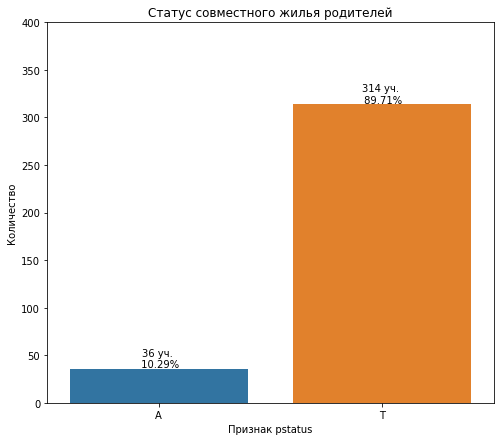

T - живут вместе, А - живут раздельно


In [41]:
col_hist('pstatus')

#### Промежуточные выводы по признаку pstatus

Имеется **45** пропущенных значений, что составляет **11.39%** от всего количества учеников, и превышает меньшее из заданных значений - **A (отдельно проживание)**.

Как и в предыдущем признаке, можно предположить существование взаимосвязи между успеваемостью учащегося и наличием полной семьи (родители проживают совместно), однако оценить, положительное или отрицательное влияние оказывает на успеваемость **статус совместного проживания родителей**, не представляется возможным.  

Поскольку пропуски составляют **более 10%** от общего количестваи и даже превышают одно из заданных значений, то заполнение их одним из значений может оказаться не осмотрительным. Вероятно, стоит ввести **новое значение pstatus**, к примеру, - **"N - отказались отвечать"**. 

In [42]:
stud['pstatus'] = stud['pstatus'].fillna(value='N')

In [43]:
col_stat('pstatus')

Исследуемый признак: pstatus
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
T        314.0     79.49
N         45.0     11.39
A         36.0      9.11
Итого:   395.0     99.99 



### Признак 07 - medu

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [44]:
col_stat('medu')

Исследуемый признак: medu
Пропуски (NaN): 3
Уникальные значения:
        Кол-во  Доля в %
4.0      131.0     33.16
2.0      102.0     25.82
3.0       97.0     24.56
1.0       59.0     14.94
0.0        3.0      0.76
NaN        3.0      0.76
Итого:   395.0    100.00 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

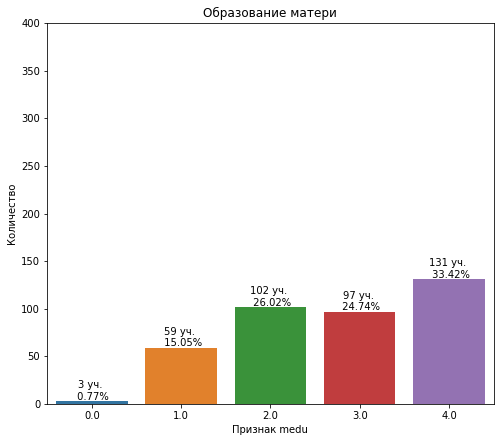

0 - нет, 1 - 4 класса, 2 - 5-9 классов, 3 - среднеспециальное или 11 классов, 4 - высшее


In [45]:
col_hist('medu')

#### Промежуточные выводы по признаку medu

Имеется **3** пропущенных значения, что составляет **0.76%** от всего количества учеников.

Одновременно с этим видим, что большее количество матерей учащихся имеют высшее образование - **33.42%**.  
Примерно равное количество - **26.02% и 24.74%** - с образованием **средняя школа** или **средне-специальное**.  

У **3** учеников **образование матери** указано в значении **0 - нет**. Маловероятно, что в современном мире женщина может не иметь вообще никакого образования - даже начальной школы. Проверим данный признак на **наличие выбросов**, построив **boxplot**.

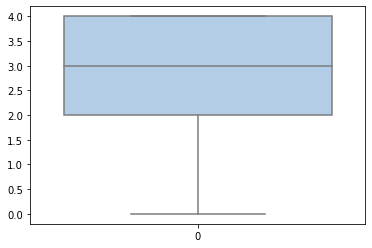

In [46]:
sns.boxplot(data=stud.medu, color='#abcdef')

На **boxplot** выбросов не обнаружено.  

Применим метод **межквартильного расстояния**.

25-й перцентиль: 2.0 
75-й перцентиль: 4.0 
IQR: 2.0 
Границы размаха: [-1.0, 7.0]


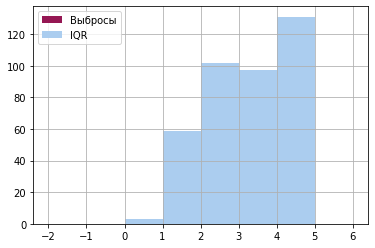

In [47]:
col_iqr('medu', rangecol=(-2, 6), binscol=8)

Данный метод также подтвердил **отсутствие выбросов**.  

Заполним отсутствующие значения наиболее часто встречающимся значением **4 - высшее образование**.

In [48]:
stud['medu'] = stud['medu'].fillna(value=4)

Убедимся, что теперь пропуски отсутствуют.

In [49]:
col_stat('medu')

Исследуемый признак: medu
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
4.0      134.0     33.92
2.0      102.0     25.82
3.0       97.0     24.56
1.0       59.0     14.94
0.0        3.0      0.76
Итого:   395.0    100.00 



### Признак 08 - fedu

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [50]:
col_stat('fedu')

Исследуемый признак: fedu
Пропуски (NaN): 24
Уникальные значения:
        Кол-во  Доля в %
2.0      106.0     26.84
3.0       96.0     24.30
4.0       88.0     22.28
1.0       78.0     19.75
NaN       24.0      6.08
0.0        2.0      0.51
40.0       1.0      0.25
Итого:   395.0    100.01 



Из полученной информации видно, что, помимо **пропусков** имеется **1 некорректное значение - 40.0**.  
Очевидно, что **40.0** является следствием **ошибки ввода**.  
Исправим данное значение на **4.0**.

In [51]:
stud['fedu'] = stud.apply(lambda x: 4 if (x.fedu == 40) else x.fedu, axis=1)

In [52]:
col_stat('fedu')

Исследуемый признак: fedu
Пропуски (NaN): 24
Уникальные значения:
        Кол-во  Доля в %
2.0      106.0     26.84
3.0       96.0     24.30
4.0       89.0     22.53
1.0       78.0     19.75
NaN       24.0      6.08
0.0        2.0      0.51
Итого:   395.0    100.01 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

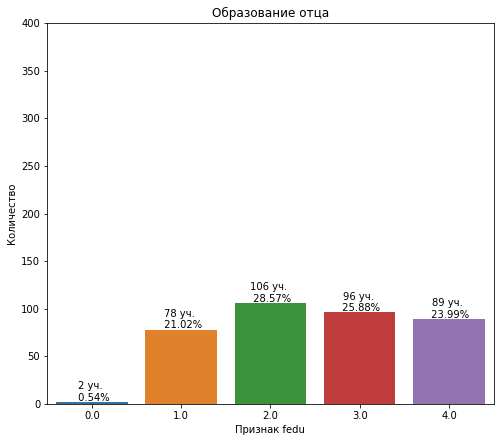

0 - нет, 1 - 4 класса, 2 - 5-9 классов, 3 - среднеспециальное или 11 классов, 4 - высшее


In [53]:
col_hist('fedu')

#### Промежуточные выводы по признаку fedu

Имеется **24** пропущенных значения, что составляет **6.08%** от всего количества учеников.

Одновременно с этим видим, что значения **1**, **2**, **3** и **4** распределены с небольшим разбросом друг от друга - в пределах **8%** все **4** значения.  

У **2** учеников **образование отца** указано в значении **0 - нет**. Также, маловероятно, что в современном мире мужчина может не иметь вообще никакого образования - даже начальной школы. Проверим данный признак на **наличие выбросов**, построив **boxplot**.

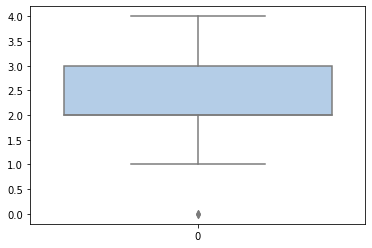

In [54]:
sns.boxplot(data=stud.fedu, color='#abcdef')

Согласно построенному **boxplot**, выбросом является только значение **0 - нет**.  
Для большей убедительности применим так же метод **межквартильного расстояния**.

25-й перцентиль: 2.0 
75-й перцентиль: 3.0 
IQR: 1.0 
Границы размаха: [0.5, 4.5]


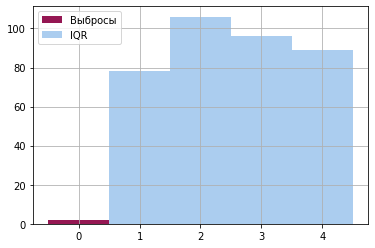

In [55]:
col_iqr('fedu', rangecol=(-0.5, 4.5), binscol=5)

Метод оценки **межквартильного расстояния** определяет границы **размаха** в значениях **0.5 - нижняя** и **4.5 - верхняя**.  
Следовательно, значение **0** действительно является **выбросом**.  
Поскольку **выбросов** по признаку **fedu** всего **2**, что составляет менее **1%** от общей выборки, то предположим, что это не системная или статистическая ошибка, а опечатка оператора при вводе данных.  
Заменим значение **fedu=0** на **fedu=1** (просто потому, что на цифровой клавиатуре высока вероятность отпечатать 0 вместо 1 :) ).

In [56]:
stud['fedu'] = stud.apply(lambda x: 1 if (x.fedu == 0) else x.fedu, axis=1)

Проверим состояние нашего признака теперь.

In [57]:
col_stat('fedu')

Исследуемый признак: fedu
Пропуски (NaN): 24
Уникальные значения:
        Кол-во  Доля в %
2.0      106.0     26.84
3.0       96.0     24.30
4.0       89.0     22.53
1.0       80.0     20.25
NaN       24.0      6.08
Итого:   395.0    100.00 



Значение **0** отсутствует, в значении **1** прибавилось 2 единицы.  
Посмотрим на **основные статистические характеристики** признака **fedu**.

In [58]:
stud.fedu.describe()

count    371.000000
mean       2.522911
std        1.078732
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

Видим, что **min** значение теперь равно **1**. Чтобы наглядно убедиться в отсутствии выбросов, еще раз построим **boxplot**.

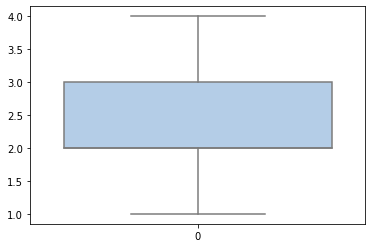

In [59]:
sns.boxplot(data=stud.fedu, color='#abcdef')

Действительно, выбросы отсутствуют.

Теперь обработаем **пропуски**.  
Заменим **пропуск** значением **4**, если в признаке **medu** стоит значение **4**, или поставим **3**, если в признаке **medu** любое другое значение.

In [60]:
stud['fedu'] = stud.apply(lambda x: (4 if x.medu == 4 else 3) if pd.isna(x.fedu) else x.fedu, axis=1)

Убедимся, что теперь пропуски отсутствуют.

In [61]:
col_stat('fedu')

Исследуемый признак: fedu
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
3.0      110.0     27.85
2.0      106.0     26.84
4.0       99.0     25.06
1.0       80.0     20.25
Итого:   395.0    100.00 



### Признак 09 - mjob

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [62]:
col_stat('mjob')

Исследуемый признак: mjob
Пропуски (NaN): 19
Уникальные значения:
          Кол-во  Доля в %
other      133.0     33.67
services    98.0     24.81
at_home     58.0     14.68
teacher     55.0     13.92
health      32.0      8.10
NaN         19.0      4.81
Итого:     395.0     99.99 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

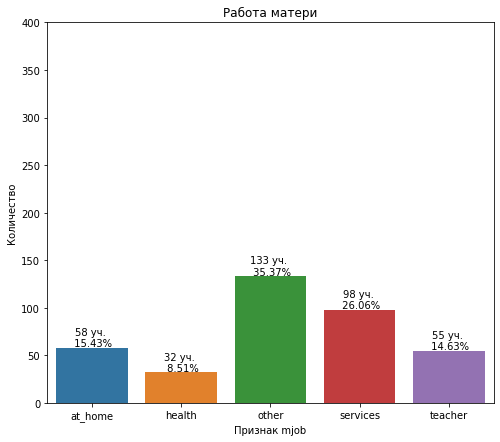

teacher - учитель, health - сфера здравоохранения, services - гос.служба, at_home - не работает, other - другое


In [63]:
col_hist('mjob')

#### Промежуточные выводы по признаку mjob

Имеется **19** пропущенных значений, что составляет **4.81%** от всего количества учеников.

Видим, что **меньше** всего учеников имеют матерей, работающих в **здравоохранении**, а **самое большое** количество матерей - из **других** сфер.  

Пропуски распределим следующим образом:  
- если образование у матери **высшее**, то заменим пропущенное значение на **teacher**;
- если образование **средне-специальное или 11 классов** - на **other**;
- иначе проставим статус **at_home**.

In [64]:
stud['mjob'] = stud.apply(lambda x: ('teacher' if x.medu == 4 else ('other' if x.medu == 3 else 'at_home')) if pd.isna(x.mjob) else x.mjob, axis=1)

Посмотрим еще раз, что у нас получилось по значениям признака.

In [65]:
col_stat('mjob')

Исследуемый признак: mjob
Пропуски (NaN): 0
Уникальные значения:
          Кол-во  Доля в %
other      139.0     35.19
services    98.0     24.81
at_home     64.0     16.20
teacher     62.0     15.70
health      32.0      8.10
Итого:     395.0    100.00 



### Признак 10 - fjob

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [66]:
col_stat('fjob')

Исследуемый признак: fjob
Пропуски (NaN): 36
Уникальные значения:
          Кол-во  Доля в %
other      197.0     49.87
services   102.0     25.82
NaN         36.0      9.11
teacher     29.0      7.34
at_home     16.0      4.05
health      15.0      3.80
Итого:     395.0     99.99 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

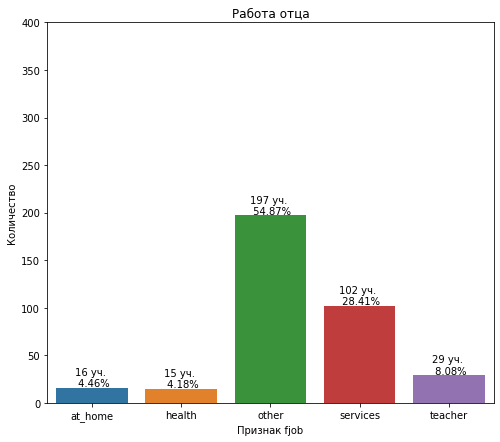

teacher - учитель, health - сфера здравоохранения, services - гос.служба, at_home - не работает, other - другое


In [67]:
col_hist('fjob')

#### Промежуточные выводы по признаку fjob

Имеется **36** пропущенных значений, что составляет **9.11%** от всего количества учеников.

Видим, что **меньше** всего учеников имеют отцов, либо работающих в **здравоохранении**, либо **не работающих**, а **самое большое** количество отцов - из **других** сфер.  

Пропуски распределим следующим образом:  
- если образование у отца **высшее**, то заменим пропущенное значение на **services**;
- если образование **средне-специальное или 11 классов** - на **health**;
- иначе проставим статус **at_home**.

In [68]:
stud['fjob'] = stud.apply(lambda x: ('services' if x.fedu == 4 else ('health' if x.fedu == 3 else 'at_home')) if pd.isna(x.fjob) else x.fjob, axis=1)

Посмотрим еще раз, что у нас получилось по значениям признака.

In [69]:
col_stat('fjob')

Исследуемый признак: fjob
Пропуски (NaN): 0
Уникальные значения:
          Кол-во  Доля в %
other      197.0     49.87
services   109.0     27.59
at_home     37.0      9.37
teacher     29.0      7.34
health      23.0      5.82
Итого:     395.0     99.99 



### Признак 11 - reason

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [70]:
col_stat('reason')

Исследуемый признак: reason
Пропуски (NaN): 17
Уникальные значения:
            Кол-во  Доля в %
course       137.0     34.68
home         104.0     26.33
reputation   103.0     26.08
other         34.0      8.61
NaN           17.0      4.30
Итого:       395.0    100.00 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

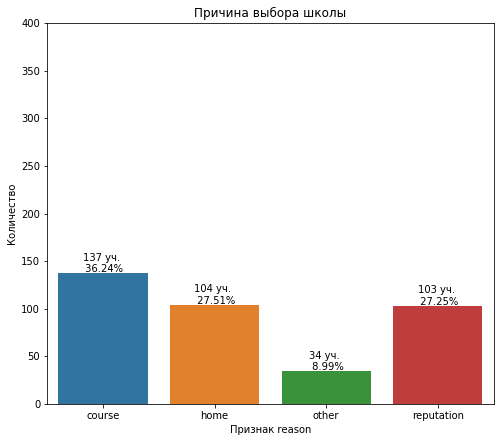

home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое


In [71]:
col_hist('reason')

#### Промежуточные выводы по признаку reason

Имеется **17** пропущенных значений, что составляет **4.3%** от всего количества учеников.

Видим, что **меньше** всего учеников в качестве причины указали **другое**. Большинство учащихся выбирало школу по **образовательной программе**.  

Пропуски распределим следующим образом:  
- если время в пути до школы **менее 15 минут**, то заменим пропущенное значение на **home**;
- если аббревиатура школы **GP** (после замены у нас это 1) - на **reputation**;
- иначе проставим статус **other**.

In [72]:
stud['reason'] = stud.apply(lambda x: ('home' if x.traveltime == 4 else ('reputation' if x.school == 1 else 'other')) if pd.isna(x.reason) else x.reason, axis=1)

Посмотрим еще раз, что у нас получилось по значениям признака.

In [73]:
col_stat('fjob')

Исследуемый признак: fjob
Пропуски (NaN): 0
Уникальные значения:
          Кол-во  Доля в %
other      197.0     49.87
services   109.0     27.59
at_home     37.0      9.37
teacher     29.0      7.34
health      23.0      5.82
Итого:     395.0     99.99 



### Признак 12 - guardian

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [74]:
col_stat('guardian')

Исследуемый признак: guardian
Пропуски (NaN): 31
Уникальные значения:
        Кол-во  Доля в %
mother   250.0     63.29
father    86.0     21.77
NaN       31.0      7.85
other     28.0      7.09
Итого:   395.0    100.00 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

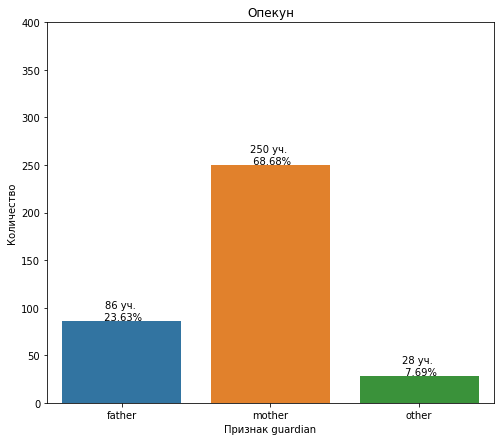

mother - мать, father - отец, other - другое


In [75]:
col_hist('guardian')

#### Промежуточные выводы по признаку guardian

Имеется **31** пропущенное значение, что составляет **7.85%** от всего количества учеников.

Видим, что **наибольшее** число учеников в качестве опекуна имеют **мать**.   

Пропуски заменим на вариант **other**, основываясь на предположении, что пропуски образовывались по причине того, что ни один из предложенных конкретных вариантов (**mother**, **father**) респонденту не подходил, а вариант **other** изначально не был выбран по причине отсутствия четкого понимания его истинного значения.

In [76]:
stud['guardian'] = stud['guardian'].fillna(value='other')

In [77]:
col_stat('guardian')

Исследуемый признак: guardian
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
mother   250.0     63.29
father    86.0     21.77
other     59.0     14.94
Итого:   395.0    100.00 



### Признак 13 - traveltime

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [78]:
col_stat('traveltime')

Исследуемый признак: traveltime
Пропуски (NaN): 28
Уникальные значения:
        Кол-во  Доля в %
1.0      242.0     61.27
2.0       96.0     24.30
NaN       28.0      7.09
3.0       22.0      5.57
4.0        7.0      1.77
Итого:   395.0    100.00 



**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

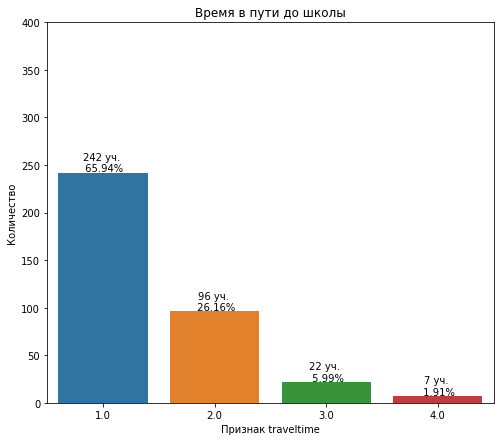

1 - менее 15 минут, 2 - 15-30 минут, 3 - 30-60 минут, 4 - более 60 минут


In [79]:
col_hist('traveltime')

#### Промежуточные выводы по признаку traveltime

Имеется **28** пропущенных значения, что составляет **7.09%** от всего количества учеников.

Одновременно с этим видим, что максимальное количество ответов пришлось на вариант **1**.

И всего около **2%** - на вариант **4**.

Из полученной информации видно, что некорректные значения отсутствуют, но имеются **пропуски**.  
Пропуски обработаем по следующему принципу:  
- если **school=1 (GP)**, а **address=U**, или **school=0 (MS)**, а **address=R** (то есть школа и место жительства находятся в одном населенном пункте), то пропущенное **traveltime** заполним значением **2 (15-30 минут)**. Ранее мы предположили, что школа **GP(1)** находится в городе, а школа **MS(0)** - в пригороде.  
- если **school=1 (GP)**, а **address=R**, или **school=0 (MS)**, а **address=U** (то есть школа и место жительства находятся в разных населенных пунктах), то пропущенное **traveltime** заполним значением **4 (более 60 минут)**.

In [80]:
stud['traveltime'] = stud.apply(lambda x: (2 if (x.school == 1 and x.address == 'U') else (2 if (x.school == 0 and x.address == 'R') else (4 if (x.school == 1 and x.address == 'R') else (4 if (x.school == 0 and x.address == 'U'))))) if pd.isna(x.traveltime) else x.traveltime, axis=1)

SyntaxError: invalid syntax (<ipython-input-80-7b2c57df49bd>, line 1)

### Признак 14 - studytime

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [81]:
col_stat('studytime')

Исследуемый признак: studytime
Пропуски (NaN): 7
Уникальные значения:
        Кол-во  Доля в %
2.0      194.0     49.11
1.0      103.0     26.08
3.0       64.0     16.20
4.0       27.0      6.84
NaN        7.0      1.77
Итого:   395.0    100.00 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

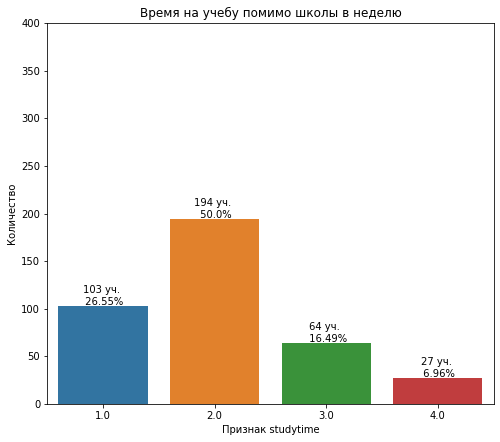

1 - менее 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - более 10 часов


In [82]:
col_hist('studytime')

#### Промежуточные выводы по признаку studytime

Имеется **7** пропущенных значений, что составляет **менее 2%** от всего количества учеников.

Заменим пропуски на самое частое значение.

In [83]:
stud['studytime'] = stud['studytime'].fillna(value=2)

In [84]:
col_stat('studytime')

Исследуемый признак: studytime
Пропуски (NaN): 0
Уникальные значения:
        Кол-во  Доля в %
2.0      201.0     50.89
1.0      103.0     26.08
3.0       64.0     16.20
4.0       27.0      6.84
Итого:   395.0    100.01 



### Признак 15 - failures

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [85]:
col_stat('failures')

Исследуемый признак: failures
Пропуски (NaN): 22
Уникальные значения:
        Кол-во  Доля в %
0.0      293.0     74.18
1.0       49.0     12.41
NaN       22.0      5.57
2.0       16.0      4.05
3.0       15.0      3.80
Итого:   395.0    100.01 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

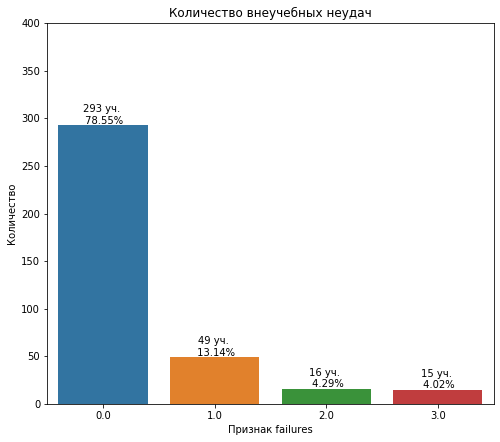

n - менее 3, 4 - 3 и более


In [86]:
col_hist('failures')

#### Промежуточные выводы по признаку failures

Имеется **22** пропущенных значения, что составляет **5,57%** от всего количества учеников.

При этом количество внеучебных неудач у всех учеников характеризуется показателем в пределах 3, и бОльшая часть неудач равна **0**, то есть неудачи отсутствуют.

**Пропуски** пока оставим.

### Признак 16 - schoolsup

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [87]:
col_stat('schoolsup')

Исследуемый признак: schoolsup
Пропуски (NaN): 9
Уникальные значения:
        Кол-во  Доля в %
no       335.0     84.81
yes       51.0     12.91
NaN        9.0      2.28
Итого:   395.0    100.00 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

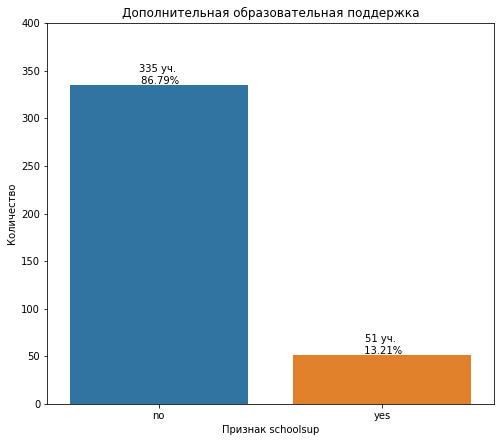

In [88]:
col_hist('schoolsup')

#### Промежуточные выводы по признаку schoolsup

Имеется **9** пропусков, что составляет **2.28%** от всего количества учеников.

При этом бОльшая часть учеников дополнительной образовательной поддержки не получают.

Поскольку значений признака всего 2, то переведем их в числа.

In [89]:
stud['schoolsup'] = stud['schoolsup'].fillna(value='no')
schoolsup_bin = {'no': 0, 'yes': 1}
stud['schoolsup'] = stud['schoolsup'].map(schoolsup_bin)

### Признаки 17-20, 22-24 - famsap, paid, activities, nursery, higher,internet, romantic

Перечисленные признаки имеют одинаковые форматы значений (yes/no), поэтому обработаем их все вместе.  
**Оценим значения исследуемых признаков**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [90]:
col_stat('famsup')

Исследуемый признак: famsup
Пропуски (NaN): 39
Уникальные значения:
        Кол-во  Доля в %
yes      219.0     55.44
no       137.0     34.68
NaN       39.0      9.87
Итого:   395.0     99.99 



In [91]:
col_stat('paid')

Исследуемый признак: paid
Пропуски (NaN): 40
Уникальные значения:
        Кол-во  Доля в %
no       200.0     50.63
yes      155.0     39.24
NaN       40.0     10.13
Итого:   395.0    100.00 



In [92]:
col_stat('activities')

Исследуемый признак: activities
Пропуски (NaN): 14
Уникальные значения:
        Кол-во  Доля в %
yes      195.0     49.37
no       186.0     47.09
NaN       14.0      3.54
Итого:   395.0    100.00 



In [93]:
col_stat('nursery')

Исследуемый признак: nursery
Пропуски (NaN): 16
Уникальные значения:
        Кол-во  Доля в %
yes      300.0     75.95
no        79.0     20.00
NaN       16.0      4.05
Итого:   395.0    100.00 



In [94]:
col_stat('higher')

Исследуемый признак: higher
Пропуски (NaN): 20
Уникальные значения:
        Кол-во  Доля в %
yes      356.0     90.13
NaN       20.0      5.06
no        19.0      4.81
Итого:   395.0    100.00 



In [95]:
col_stat('internet')

Исследуемый признак: internet
Пропуски (NaN): 34
Уникальные значения:
        Кол-во  Доля в %
yes      305.0     77.22
no        56.0     14.18
NaN       34.0      8.61
Итого:   395.0    100.01 



In [96]:
col_stat('romantic')

Исследуемый признак: romantic
Пропуски (NaN): 31
Уникальные значения:
        Кол-во  Доля в %
no       240.0     60.76
yes      124.0     31.39
NaN       31.0      7.85
Итого:   395.0    100.00 



Из полученной информации видно, что некорректных значений нет, но в каждом признаке присутствуют **пропуски**.  

**Построим гистограммы распределения значений исследуемых признаков**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

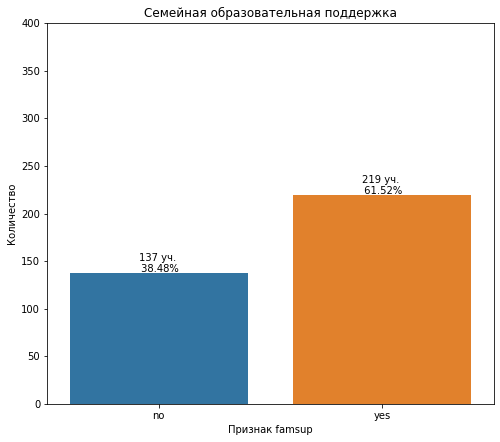

In [97]:
col_hist('famsup')

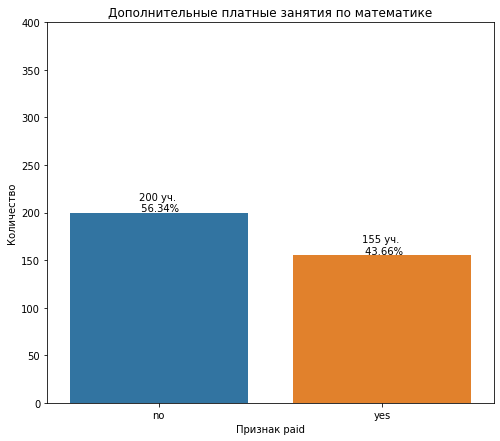

In [98]:
col_hist('paid')

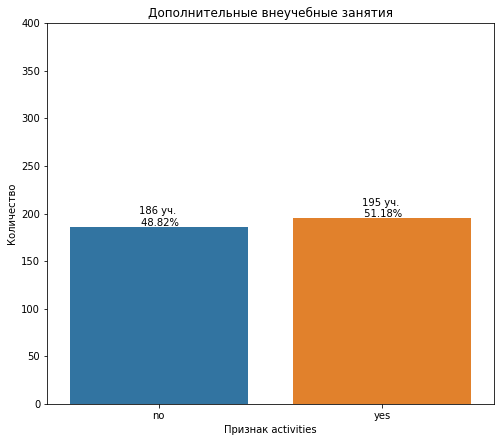

In [99]:
col_hist('activities')

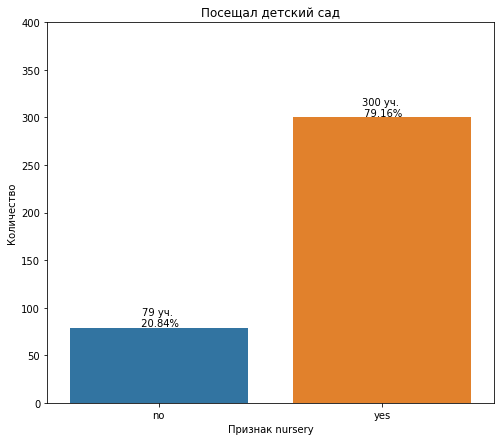

In [100]:
col_hist('nursery')

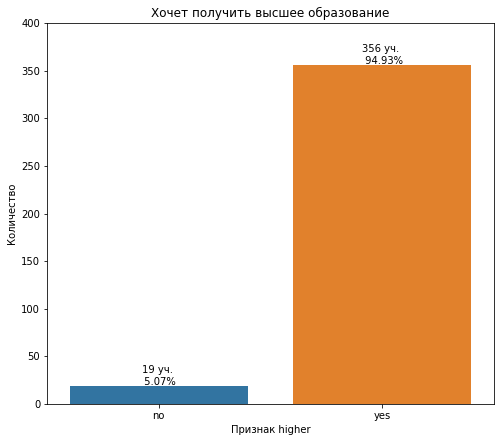

In [101]:
col_hist('higher')

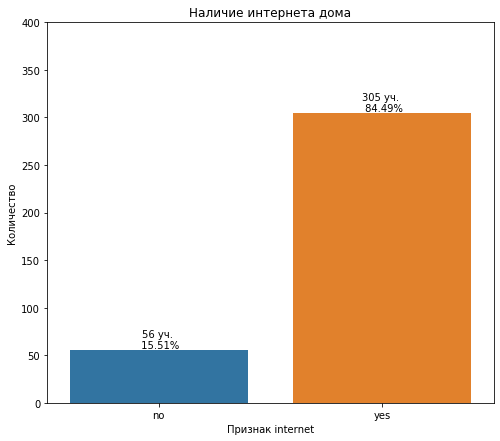

In [102]:
col_hist('internet')

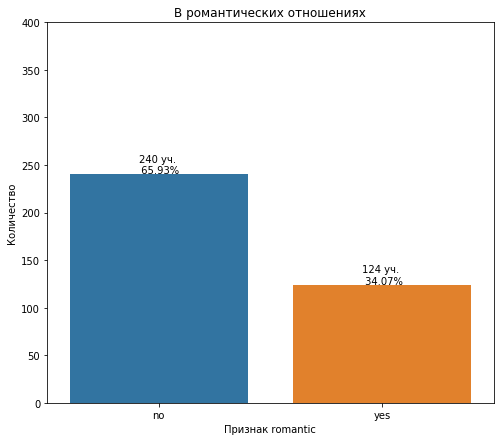

In [103]:
col_hist('romantic')

#### Промежуточные выводы по признакам famsap, paid, activities, nursery, higher,internet, romantic

В признаке **activities** значения распределены примерно одинаково (с незначительным перевесом ответа **yes**).  
В признаках **paid** и **romantic** превалирует ответ **no**.  
В остальных признаках преобладает ответ **yes**.  

В каждом признаке заменим **пропуски** преобладающим значением и переведем в числа.

In [104]:
stud['famsup'] = stud['famsup'].fillna(value='yes')

In [105]:
famsup_bin = {'no': 0, 'yes': 1}
stud['famsup'] = stud['famsup'].map(famsup_bin)

In [106]:
stud['paid'] = stud['paid'].fillna(value='no')

In [107]:
paid_bin = {'no': 0, 'yes': 1}
stud['paid'] = stud['paid'].map(paid_bin)

In [108]:
stud['activities'] = stud['activities'].fillna(value='yes')

In [109]:
activities_bin = {'no': 0, 'yes': 1}
stud['activities'] = stud['activities'].map(activities_bin)

In [110]:
stud['nursery'] = stud['nursery'].fillna(value='yes')

In [111]:
nursery_bin = {'no': 0, 'yes': 1}
stud['nursery'] = stud['nursery'].map(nursery_bin)

In [112]:
stud['higher'] = stud['higher'].fillna(value='yes')

In [113]:
higher_bin = {'no': 0, 'yes': 1}
stud['higher'] = stud['higher'].map(higher_bin)

In [114]:
stud['internet'] = stud['internet'].fillna(value='yes')

In [115]:
internet_bin = {'no': 0, 'yes': 1}
stud['internet'] = stud['internet'].map(internet_bin)

In [116]:
stud['romantic'] = stud['romantic'].fillna(value='yes')

In [117]:
romantic_bin = {'no': 0, 'yes': 1}
stud['romantic'] = stud['romantic'].map(romantic_bin)

Посмотрим на текущее состояние датасета.

In [118]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school           395 non-null int64
sex              395 non-null int64
age              395 non-null int64
address          395 non-null object
famsize          395 non-null object
pstatus          395 non-null object
medu             395 non-null float64
fedu             395 non-null float64
mjob             395 non-null object
fjob             395 non-null object
reason           395 non-null object
guardian         395 non-null object
traveltime       367 non-null float64
studytime        395 non-null float64
failures         373 non-null float64
schoolsup        395 non-null int64
famsup           395 non-null int64
paid             395 non-null int64
activities       395 non-null int64
nursery          395 non-null int64
studytimegran    388 non-null float64
higher           395 non-null int64
internet         395 non-null int64
romantic         395 non-null int64
famrel      

### Признак 21 - studytimegran - не упомянутый в описании исходного задания

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [119]:
col_stat('studytimegran')

Исследуемый признак: studytimegran
Пропуски (NaN): 7
Уникальные значения:
        Кол-во  Доля в %
-6.0     194.0     49.11
-3.0     103.0     26.08
-9.0      64.0     16.20
-12.0     27.0      6.84
NaN        7.0      1.77
Итого:   395.0    100.00 



Из полученной информации видно, что некорректных значений нет, но есть **пропуски**.  

**Построим гистограмму распределения значений исследуемого признака**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

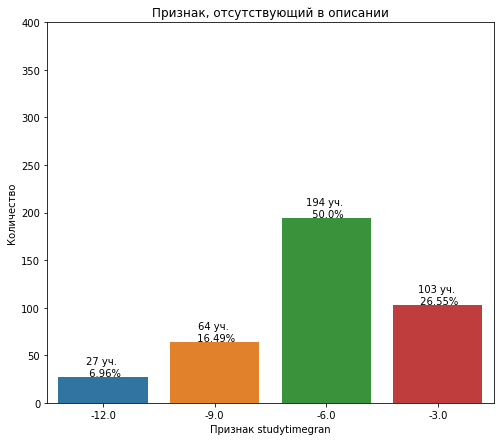

In [120]:
col_hist('studytimegran')

#### Промежуточные выводы по признаку studytimegran

Имеется **7** пропусков, что составляет **1.77%** от всего количества учеников.

При этом значения признака **studytimegran** получаются умножением на **-3** значений признака **studytime**. По логике должна получаться корреляция **-1**, проверим, так ли это.

In [121]:
stud['studytime'].corr(stud['studytimegran'])

-1.0

Действительно, так и есть. Но удалять признак пока не станем, поскольку **природное чутье и интуиция** говорят, что тут **всё не настолько просто** :) Позже проверим, так ли это.

### Признаки 25-28 - famrel, freetime, goout, health

Перечисленные признаки имеют одинаковые форматы значений (шкала от 1 до 5), поэтому обработаем их все вместе.  
**Оценим значения исследуемых признаков**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [122]:
col_stat('famrel')

Исследуемый признак: famrel
Пропуски (NaN): 27
Уникальные значения:
        Кол-во  Доля в %
4.0      182.0     46.08
5.0       99.0     25.06
3.0       62.0     15.70
NaN       27.0      6.84
2.0       17.0      4.30
1.0        7.0      1.77
-1.0       1.0      0.25
Итого:   395.0    100.00 



Очевидно, что среди значений данного признака присутствует **1 некорректное** - **-1**.
Заменим его на **1**.

In [123]:
stud['famrel'] = stud.apply(lambda x: 1 if (x.famrel == -1) else x.famrel, axis=1)

In [124]:
col_stat('famrel')

Исследуемый признак: famrel
Пропуски (NaN): 27
Уникальные значения:
        Кол-во  Доля в %
4.0      182.0     46.08
5.0       99.0     25.06
3.0       62.0     15.70
NaN       27.0      6.84
2.0       17.0      4.30
1.0        8.0      2.03
Итого:   395.0    100.01 



In [125]:
col_stat('freetime')

Исследуемый признак: freetime
Пропуски (NaN): 11
Уникальные значения:
        Кол-во  Доля в %
3.0      153.0     38.73
4.0      112.0     28.35
2.0       63.0     15.95
5.0       38.0      9.62
1.0       18.0      4.56
NaN       11.0      2.78
Итого:   395.0     99.99 



In [126]:
col_stat('goout')

Исследуемый признак: goout
Пропуски (NaN): 8
Уникальные значения:
        Кол-во  Доля в %
3.0      127.0     32.15
2.0      101.0     25.57
4.0       84.0     21.27
5.0       52.0     13.16
1.0       23.0      5.82
NaN        8.0      2.03
Итого:   395.0    100.00 



In [127]:
col_stat('health')

Исследуемый признак: health
Пропуски (NaN): 15
Уникальные значения:
        Кол-во  Доля в %
5.0      138.0     34.94
3.0       89.0     22.53
4.0       63.0     15.95
1.0       47.0     11.90
2.0       43.0     10.89
NaN       15.0      3.80
Итого:   395.0    100.01 



Из полученной информации видно, что теперь некорректных значений нет, но в каждом признаке присутствуют **пропуски**.  

**Построим гистограммы распределения значений исследуемых признаков**:
- по оси Х расположим значения признака;
- по оси Y - количество объектов с тем или иным значением признаков;
- каждому значению признака подпишем соответствующее ему количество и долю в %;
- под диаграммой дадим расшифровку значений признаков, если таковая приведена в исходных данных.

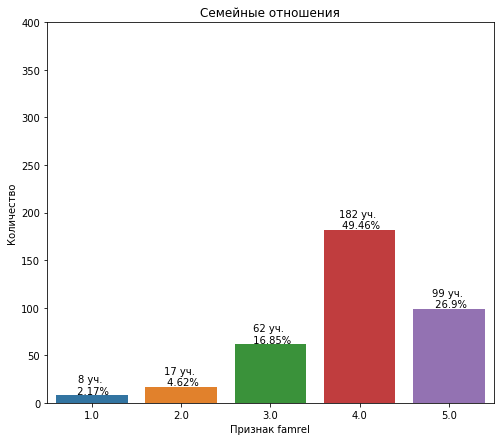

1 - очень плохо, 5 - очень хорошо


In [128]:
col_hist('famrel')

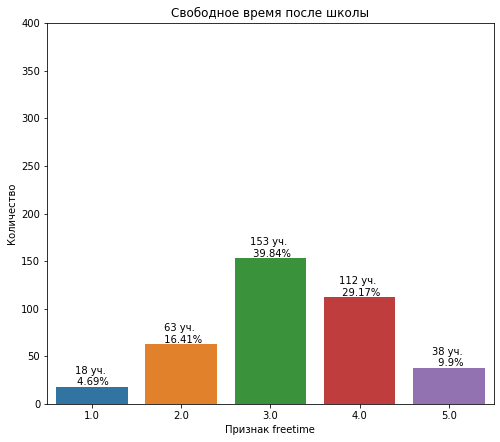

1 - очень мало, 5 - очень много


In [129]:
col_hist('freetime')

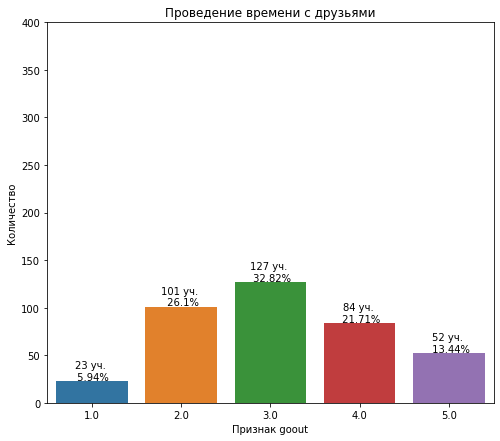

1 - очень мало, 5 - очень много


In [130]:
col_hist('goout')

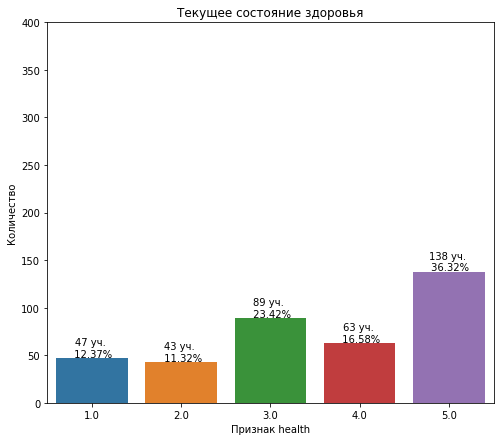

1 - очень плохо, 5 - очень хорошо


In [131]:
col_hist('health')

Для каждого признака построим **boxplot**, чтобы проверить наличие выбросов.

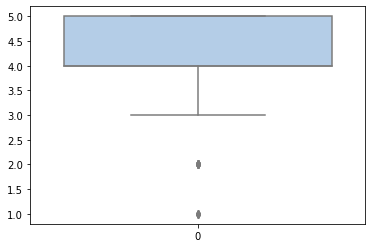

In [132]:
sns.boxplot(data=stud.famrel, color='#abcdef')

Согласно построенному **boxplot**, выбросами являются значения **1** и **2**. График по методу **межквартильного расстояния** тоже определяет данные значения как выбросы, однако не будем спешить их удалять, поскольку они могут коррелировать с плохой успеваемостью или неявкой на экзамен.

25-й перцентиль: 4.0 
75-й перцентиль: 5.0 
IQR: 1.0 
Границы размаха: [2.5, 6.5]


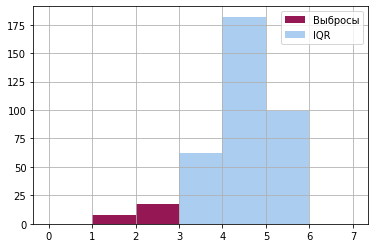

In [140]:
col_iqr('famrel', rangecol=(0, 7), binscol=7)

**boxplot** для признака **freetime**

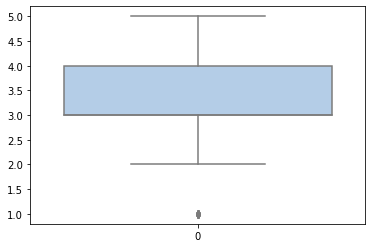

In [141]:
sns.boxplot(data=stud.freetime, color='#abcdef')

25-й перцентиль: 3.0 
75-й перцентиль: 4.0 
IQR: 1.0 
Границы размаха: [1.5, 5.5]


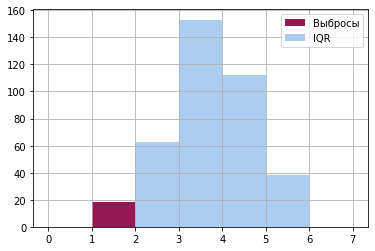

In [142]:
col_iqr('freetime', rangecol=(0, 7), binscol=7)

Согласно построенному **boxplot**, выбросом определено значение **1**. График по методу **межквартильного расстояния** тоже определяет данную величину как выброс, однако так же не будем спешить ее удалять.

**boxplot** для признака **goout**

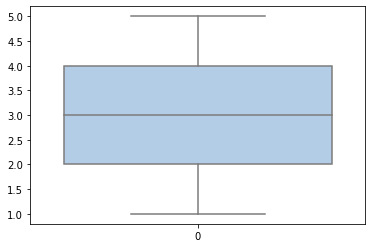

In [143]:
sns.boxplot(data=stud.goout, color='#abcdef')

25-й перцентиль: 2.0 
75-й перцентиль: 4.0 
IQR: 2.0 
Границы размаха: [-1.0, 7.0]


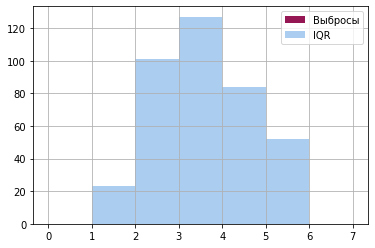

In [144]:
col_iqr('goout', rangecol=(0, 7), binscol=7)

Согласно построенному **boxplot** и **IQR**, выбросов по признаку **goout** не обнаруживается. Отлично. Смотрим далее.

**boxplot** для признака **health**

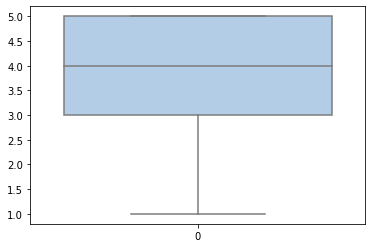

In [145]:
sns.boxplot(data=stud.health, color='#abcdef')

25-й перцентиль: 3.0 
75-й перцентиль: 5.0 
IQR: 2.0 
Границы размаха: [0.0, 8.0]


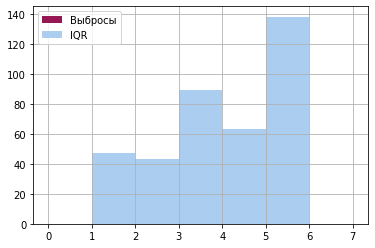

In [146]:
col_iqr('health', rangecol=(0, 7), binscol=7)

Здесь по **boxplot** и **IQR**, выбросов по признаку **goout** так же не обнаруживается.

### Признак 29 - absences

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [147]:
col_stat('absences')

Исследуемый признак: absences
Пропуски (NaN): 12
Уникальные значения:
        Кол-во  Доля в %
0.0      111.0     28.10
2.0       60.0     15.19
4.0       53.0     13.42
6.0       31.0      7.85
8.0       21.0      5.32
10.0      17.0      4.30
12.0      12.0      3.04
NaN       12.0      3.04
14.0      12.0      3.04
3.0        8.0      2.03
16.0       7.0      1.77
7.0        6.0      1.52
5.0        5.0      1.27
18.0       5.0      1.27
20.0       4.0      1.01
1.0        3.0      0.76
22.0       3.0      0.76
9.0        3.0      0.76
13.0       2.0      0.51
15.0       2.0      0.51
11.0       2.0      0.51
25.0       1.0      0.25
54.0       1.0      0.25
385.0      1.0      0.25
26.0       1.0      0.25
56.0       1.0      0.25
24.0       1.0      0.25
212.0      1.0      0.25
21.0       1.0      0.25
75.0       1.0      0.25
30.0       1.0      0.25
19.0       1.0      0.25
38.0       1.0      0.25
40.0       1.0      0.25
23.0       1.0      0.25
17.0       1.0      0.25
28.0 

### Признак 30 - score - целевая переменная

**Оценим значения исследуемого признака**:  
- проверим наличие пропусков и выведем их количество;
- посчитаем и выведем количество каждого из значений признака;
- посчитаем и выведем долю в процентах для каждого значения признака;
- посчитаем и выведем суммарное количество всех значений признака.

In [149]:
col_stat('score')

Исследуемый признак: score
Пропуски (NaN): 6
Уникальные значения:
        Кол-во  Доля в %
50.0      54.0     13.67
55.0      46.0     11.65
0.0       37.0      9.37
75.0      33.0      8.35
65.0      31.0      7.85
40.0      31.0      7.85
60.0      31.0      7.85
45.0      27.0      6.84
70.0      27.0      6.84
80.0      16.0      4.05
30.0      15.0      3.80
90.0      12.0      3.04
35.0       9.0      2.28
25.0       7.0      1.77
NaN        6.0      1.52
85.0       6.0      1.52
95.0       5.0      1.27
100.0      1.0      0.25
20.0       1.0      0.25
Итого:   395.0    100.02 



Оставим **пропуски** в двух последних переменных пока без замещения.

Итак, была проведена предварительная обработка признаков. Где-то **пропуски** были заменены на наиболее вероятные, по моему мнению, какие-то оставлены без замещений.  

Приступим к корреляционному анализу.

## Корреляционный анализ количественных переменных

Посмотрим, как выглядит наш **датасет** на текущий момент.

In [150]:
stud.head(20)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytimegran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,1,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,1,17,U,GT3,N,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,1,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,1,4.0,3.0,2.0,3.0,10.0,50.0
3,1,1,15,U,GT3,T,4.0,2.0,health,at_home,home,mother,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,1,1,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
5,1,0,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,4.0,2.0,5.0,10.0,75.0
6,1,0,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0,0,0,0,1,-6.0,1,1,0,4.0,4.0,4.0,3.0,0.0,55.0
7,1,1,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,1,1,0,0,1,-6.0,1,0,0,4.0,1.0,4.0,1.0,6.0,30.0
8,1,0,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,1,0,NaN,2.0,2.0,1.0,0.0,95.0
9,1,0,15,U,GT3,N,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,5.0,1.0,5.0,0.0,75.0


**Количественными** в нашем датасете являются переменные **age**, **absences** и **score**.  
Посмотрим на их корреляцию.

In [151]:
stud_count = stud[['age', 'absences', 'score']]

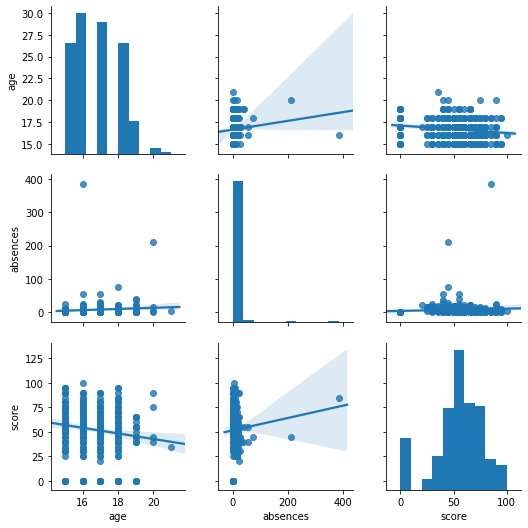

In [153]:
sns.pairplot(stud_count, kind='reg')

Построим для наглядности **матрицу корреляций** и посмотрим насколько скоррелированы или не скоррелированы наши признаки с целевой переменной и между собой.

In [154]:
stud_count.corr()

,age,absences,score
age,1.000000,0.093369,-0.155732
absences,0.093369,1.000000,0.065283
score,-0.155732,0.065283,1.000000


Делаем вывод, что признаки между собой не скоррелированы. Оставляем для дальнейшего анализа обе переменные: **age** и **abscences**.

## Анализ категориальных переменных

### Проанализируйте номинативные переменные и устраните те, которые **не влияют** на предсказываемую величину (в нашем случае — на переменную **score**).

### Не забудьте **сформулировать выводы** относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

## Основные итоги работы

## Ответы на вопросы саморефлексии:
1. Какова была ваша роль в команде?

2. Какой частью своей работы вы остались особенно довольны?

3. Что не получилось сделать так, как хотелось? Над чем ещё стоит поработать?

4. Что интересного и полезного вы узнали в этом модуле?

5. Что является вашим главным результатом при прохождении этого проекта?

6. Какие навыки вы уже можете применить в текущей деятельности?

7. Планируете ли вы дополнительно изучать материалы по теме проекта?